In [ ]:
## Everything was deleted because I ran out of memory, so now I need to rewrite the entire plootting script for everythin
# FUCK FUCK FUCK

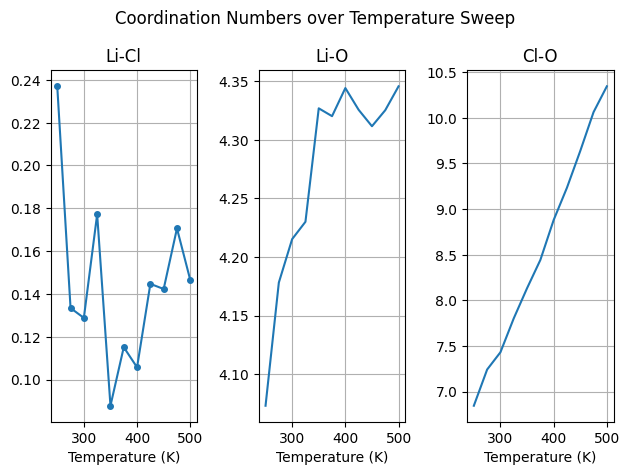

In [9]:
## Coordination numbers from setonix.
LiCl_coord = [0.2370, 0.1334, 0.1288, 0.1772, 0.08775, 0.1151, 0.1057, 0.1447, 0.1423, 0.1706, 0.1465]
LiO_coord = [4.0730, 4.1782, 4.2153, 4.2301, 4.3270, 4.3203, 4.3443, 4.3257, 4.3117, 4.3254, 4.3458]
ClO_coord = [6.8443, 7.2413, 7.4306, 7.8018, 8.1321, 8.4418, 8.8795, 9.2338, 9.6365, 10.0622, 10.3453]
temps = [250, 275, 300, 325, 350, 375, 400, 425, 450, 475, 500]

# Imports
from matplotlib import pyplot as plt

[fig, axs] = plt.subplots(1,3)

# plt.plot(temps, LiCl_coord, temps, LiO_coord, temps, ClO_coord)
axs[0].plot(temps, LiCl_coord, marker='.', markersize=8)
axs[0].set_title("Li-Cl")
axs[1].plot(temps, LiO_coord, marker='.', markersize=8)
axs[1].set_title("Li-O")
axs[2].plot(temps, ClO_coord, marker='.', markersize=8)
axs[2].set_title("Cl-O")
# plt.legend(["Li-Cl", "Li-O", "Cl-O"])
axs[0].set_xlabel("Temperature (K)")
axs[1].set_xlabel("Temperature (K)")
axs[2].set_xlabel("Temperature (K)")
axs[0].grid()
axs[1].grid()
axs[2].grid()
fig.suptitle("Coordination Numbers over Temperature Sweep")
fig.tight_layout()
fig.show()